# WordGame data analysis

Welcome to my WordGame project! In this first notebook, our goal is to extract interesting features from the Wordgame dataset, a dataset containing 0.3M word-word associations scraped from Word Association Games running on 10 internet forums. Finding meaningful features in this dataset is necessary to build a classification model and in itself may already provide novel insights into the human mind. 

Let's open up the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('../input/wordgame_201706.csv')
df = pd.read_csv('../data/processed/wordgame_201706.csv', dtype='object')
#store words as string
df['word1'] = df['word1'].astype('str') 
df['word2'] = df['word2'].astype('str') 
#print first rows
df.head()

,author,word1,word2,source
0,4688,Crows,Feet,the_fishy
1,4841,Salute,Respect,the_fishy
2,1732,Pride,Arrogance,gog
3,1272,knife,butter,gog
4,418,Bed Head,My hair right now,atu2


The dataset contains 4 columns; author, word1, word2 and source. Word1 and word2 can also be a phrase or in some cases even a whole sentence. In each row, word1 is the given word and word2 is the word-association the **author** had after reading that word. Source represents from which forum the information was scraped. Also note that the set words 'word1' is identical to the set 'word2', except for some small differences due to dropping some word pairs in the data cleaning process, the words only appear in a different order in the dataset.

## Sources
We have data from 10 sources, respectively <a href="https://www.aspiescentral.com">Aspies Central</a>, <a href="forum.atu2.com">@U2</a>, <a href="bleepingcomputer.com">BleepingComputer</a>, <a href="classiccomics.org">Classic Comics</a>, <a href="https://www.e-cigarette-forum.com">ECF</a>, GOG, <a href="http://learn-english-forum.org/">Learn English Forum</a>, SAS, The Fishy and <a href="www.wrongplanet.net">Wrong Planet</a>.

We do not know details like the gender and the age of the users of the d, so even if we would be able to build a multi-class classification model that can classify all pairs with 100% accuracy (which is impossible offcourse), we still would be unable to say something about specific groups of users. However, 23% of the data was purposely scraped from autism-related websites, Aspies Central (SourceID: 0) and Wrong Planet (SourceID: 9). Research has shown that persons with an ASD have different brain. Therefore, 


In [20]:
# create a source ID (0, .., 9) sources are alphabetically ordered
df['sourceID'] = df['source'].astype('category').cat.codes

#returns False for sources 0 and 9 and True for others. 
def isNt(r):
	return ((r.sourceID%9)>0)

#group sources based on (assumed) brain-structure of their users (neural-typical versus ASD)
df['nt'] = df.apply(isNt, axis=1)
print("Number of NT-pairs: " + str(len(df[df['nt']])))
print("Number of ASD-pairs: " + str(len(df[df['nt']==False])))

Number of NT-pairs: 245628
Number of ASD-pairs: 70105


## Word length
We are now ready to extract our first feature, which will be the word length. I do not expect any differences, but I'm simply curious .. Word = post! 

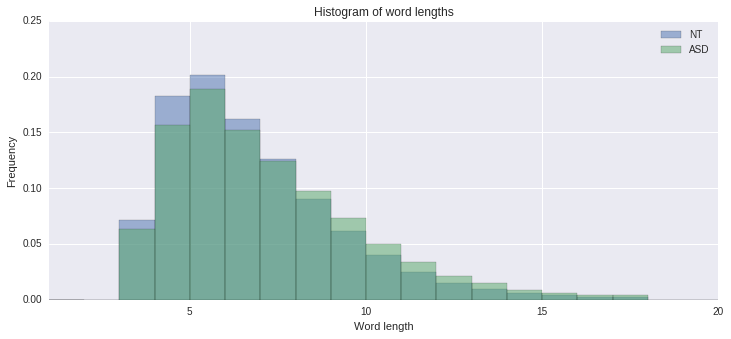

In [11]:
df['len1'] = df['word1'].apply(lambda x:len(x))
df['len2'] = df['word2'].apply(lambda x:len(x))

## plot word length histogram
nt = df[df['nt']].len1
asd = df[df['nt']==False].len1

w1 = np.ones_like(nt)/len(nt)
w2 = np.ones_like(asd)/len(asd)

bins = np.arange(1,21)

plt.figure(figsize=(12, 5))
plt.hist(nt, bins=bins, alpha=0.5, label="NT", weights=w1)
plt.hist(asd, bins=bins,alpha=0.5, label="ASD", weights=w2)
plt.title('Histogram of word lengths')
plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([1,20])
plt.show()

A post contains on average 7 characters. Most words are between 3 and 15 characters long. The longest word is 200 characters long. **NT'ers shorter words, ..**

## User activity
Another h. important aspect is user activity..


Post count of most active user: 11053
Total number of users: 6256
	Number of NT'ers: 4482
	Number of ASD'ers: 1774


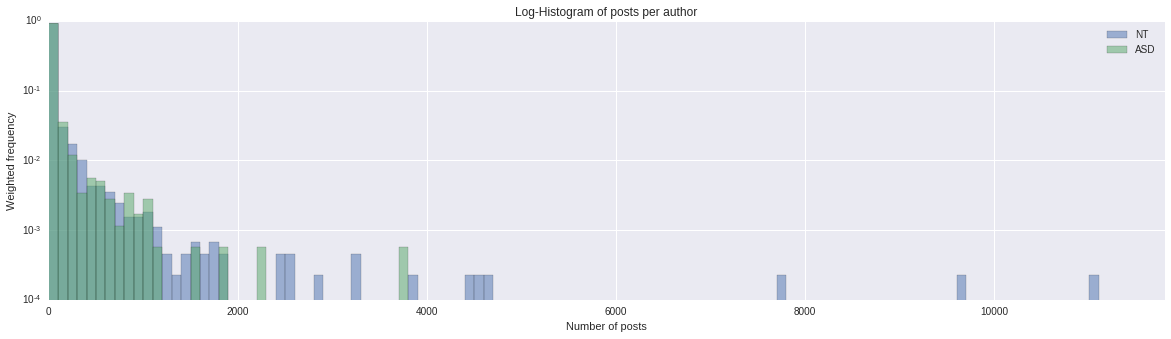

In [24]:
#
print("Post count of most active user: " + str(df['author'].value_counts().max()))
print("Total number of users: " + str(len(df.groupby(['author']))))

#Plot
nt = df[df['nt']]
nt = nt['author'].value_counts()
asd = df[df['nt']==False]
asd = asd['author'].value_counts()
print("\tNumber of NT'ers: " + str(len(nt)))
print("\tNumber of ASD'ers: " + str(len(asd)))

bins = np.arange(1,11800,100)
w1 = np.ones_like(nt)/len(nt)
w2 = np.ones_like(asd)/len(asd)

plt.figure(figsize=(20, 5))
plt.hist(nt, bins=bins, alpha=0.5, label="NT", weights=w1)
plt.hist(asd, bins=bins, alpha=0.5, label="ASD", weights=w2)
plt.yscale('log')
plt.title('Log-Histogram of posts per author')
plt.xlabel('Number of posts')
plt.ylabel('Weighted frequency')
plt.legend(loc='upper right')
axes = plt.gca()
axes.set_xlim([1,11800])
plt.show()

Conserning 11000 posts! (5%!)

## Frequent words
....
Given this enormous bag of words, what would be the most frequently occurring words? Would it be random words like 'fork' or would it represent the most important aspects of life?

In [63]:
# convert all words to lowercase
df['word1'] = df['word1'].map(str).apply(lambda x: x.lower())
df['word2'] = df['word2'].map(str).apply(lambda x: x.lower())
#print(df['word2'].value_counts().head(7))

nt = df[df['nt']]
asd = df[df['nt']==False]

#relative word count
nt = (nt['word2'].value_counts()/len(nt))
asd = (asd['word2'].value_counts()/len(asd))
#print("Median word probability NT: " +str(nt.median()))
#print("Median word probability ASD: " +str(asd.median()))

print(nt.head(10))
print(asd.head(10))


Median word count NT: 4.071197094793753e-06
Median word count ASD: 1.4264317809000785e-05
water    0.001954
time     0.001730
music    0.001612
love     0.001429
house    0.001343
fire     0.001335
money    0.001331
man      0.001331
ball     0.001323
game     0.001315
Name: word2, dtype: float64
water    0.002268
food     0.001854
music    0.001797
money    0.001712
death    0.001555
fire     0.001512
dog      0.001483
time     0.001398
love     0.001355
blood    0.001298
Name: word2, dtype: float64


The word 'water' is 500

I found it really fascinating to discover which words are most likely to pop-up in anyone's head. 
It appears that the most frequent words occuring in association games, are not random at all. Some of the words even are the most important aspects of life, water and food for example...   

## Levenshtein Distance
...............
...........

In [9]:
import Levenshtein

def levenshtein(r):
#	return 1
	return Levenshtein.distance(r.word1, r.word2)

df['edit'] = df.apply(levenshtein, axis=1)
#save interm!

print("Mean edit distance: "+ str(df['edit'].mean()))





Mean edit distance: 6.81435996312


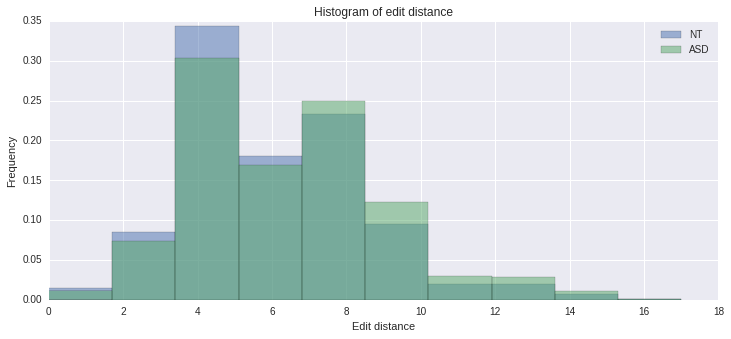

In [10]:
#delete outliers in terms of word length
df = df[(2 < df['len1']) & (df['len1'] < 18) & (2 < df['len2']) & (df['len2'] < 18)]

nt = df[(df['nt'] == True)]
asd = df[(df['nt'] == False)]

weights_nt = np.ones_like(nt['edit'])/len(nt['edit'])
weights_asd = np.ones_like(asd['edit'])/len(asd['edit'])

#nt['edit'].plot.hist(by='edit', bins=15, alpha=0.5, label='NT', weights=weights_nt)
#asd['edit'].plot.hist(by='edit', bins=15, alpha=0.5, label='ASD', weights=weights_asd)

plt.figure(figsize=(12, 5))
plt.hist(nt['edit'], bins=10, alpha=0.5, label="NT", weights=weights_nt)
plt.hist(asd['edit'], bins=10, alpha=0.5, label="ASD", weights=weights_asd)
plt.title('Histogram of edit distance')
plt.xlabel('Edit distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()